# Display Digit Images
Display some digit images from the MNIST dataset for a visual understanding of the data.

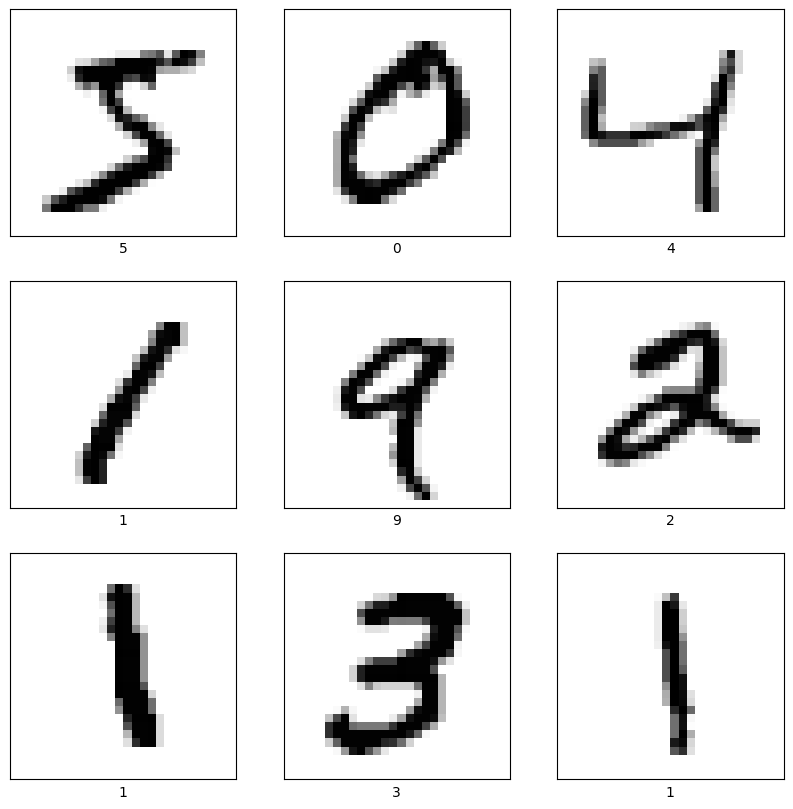

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Function to display a grid of 9 images along with their corresponding labels
def display_images(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()

# Display images from the training dataset
display_images(train_images, train_labels)

# Load and Preprocess the MNIST Dataset
Load the MNIST dataset and preprocess it by normalizing the pixel values and converting the labels to one-hot vectors.

In [6]:
# Preprocess the data
from keras.utils import to_categorical

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

# Convert labels to one-hot vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Implement Multi-layer Feed Forward Neural Network
Implement a multi-layer feed forward neural network using a deep learning library such as TensorFlow or PyTorch.

In [7]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# Compile the model
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model
model.fit(
  train_images,
  train_labels,
  epochs=1,
  batch_size=32,
)

# Evaluate the model
model.evaluate(
  test_images,
  test_labels
)

313/313 [==============================] - 10s 31ms/step - loss: 0.2212 - accuracy: 0.9322


[0.22120872139930725, 0.932200014591217]

# Train the Network with Different Configurations and Activation Functions
Train the neural network with different configurations (number of layers, number of neurons per layer) and activation functions (ReLU, sigmoid, tanh).

In [8]:
# Define different configurations
configurations = [
    {'layers': [32, 32], 'activation': 'relu'},
    {'layers': [64, 64], 'activation': 'relu'},
    {'layers': [32, 32], 'activation': 'sigmoid'},
    {'layers': [64, 64], 'activation': 'sigmoid'},
    {'layers': [32, 32], 'activation': 'tanh'},
    {'layers': [64, 64], 'activation': 'tanh'},
]

# Train and evaluate a model for each configuration
for config in configurations:
    # Define the model
    model = Sequential()
    model.add(Dense(config['layers'][0], activation=config['activation'], input_shape=(784,)))
    for layer_size in config['layers'][1:]:
        model.add(Dense(layer_size, activation=config['activation']))
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    # Train the model
    model.fit(
      train_images,
      train_labels,
      epochs=1,
      batch_size=32,
    )

    # Evaluate the model
    loss, accuracy = model.evaluate(
      test_images,
      test_labels
    )
    print(f'Configuration: {config}, Loss: {loss}, Accuracy: {accuracy}\n')

313/313 [==============================] - 11s 34ms/step - loss: 0.2729 - accuracy: 0.9197
Configuration: {'layers': [32, 32], 'activation': 'relu'}, Loss: 0.2728715240955353, Accuracy: 0.919700026512146

313/313 [==============================] - 10s 31ms/step - loss: 0.2116 - accuracy: 0.9342
Configuration: {'layers': [64, 64], 'activation': 'relu'}, Loss: 0.21163298189640045, Accuracy: 0.9341999888420105

313/313 [==============================] - 11s 35ms/step - loss: 0.3267 - accuracy: 0.9146
Configuration: {'layers': [32, 32], 'activation': 'sigmoid'}, Loss: 0.3266794979572296, Accuracy: 0.9146000146865845

313/313 [==============================] - 8s 24ms/step - loss: 0.2539 - accuracy: 0.9276
Configuration: {'layers': [64, 64], 'activation': 'sigmoid'}, Loss: 0.25386178493499756, Accuracy: 0.9276000261306763

313/313 [==============================] - 12s 36ms/step - loss: 0.2312 - accuracy: 0.9292
Configuration: {'layers': [32, 32], 'activation': 'tanh'}, Loss: 0.231199800968

# Plot Confusion Matrix
Plot the confusion matrix to visualize the performance of the network on the test data.

313/313 [==============================] - 8s 24ms/step


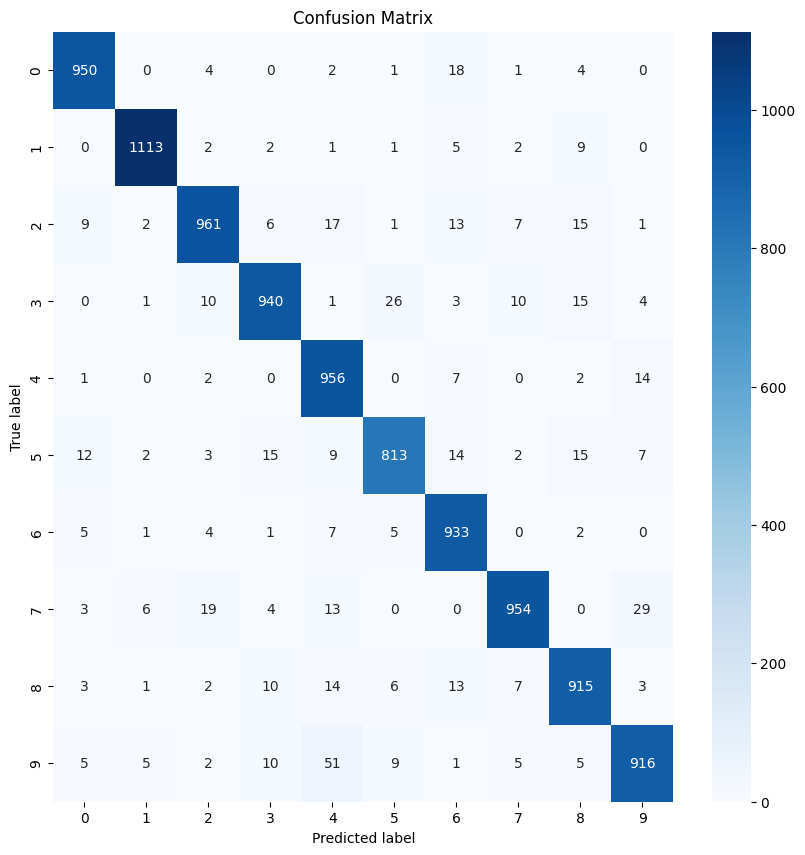

In [9]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the labels of the test set
y_pred = model.predict(test_images)

# Convert the one-hot vectors to labels
y_pred_labels = np.argmax(y_pred, axis=1)
test_labels_single_digit = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels_single_digit, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()